Link to dataset: https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy

Scenario 1: State tax board

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and wants a report of current liquor sales by county and projections for the rest of the year.

Goal for Scenario #1: Your task is as follows:

Calculate the yearly liquor sales for each score using the provided data. You can add up the transactions for each year, and store sales in 2015 specifically will be used later as your target variable.


Use the data from 2015 to make a linear model using as many variables as you find useful to predict the yearly sales of each store. You must use the sales from Jan to March per store as one of your variables.


Use your model for 2015 to estimate total sales for each store in 2016, extrapolating from the sales so far for Jan-March of 2016.


Report your findings, including any projected increase or decrease in total sales (over the entire state) for the tax committee of the Iowa legislature.

Use cross-validation to check how your model predicts to held out data compared to the model metrics on the full dataset.

Challenging Bonus: We did not cover the topics of regularization for linear regression this week, but those feeling bold can try to use and understand regularizing linear regressions. This will require self-guided research/reading and scikit-learn functions that we have not gone over in class! Use cross-validation to tune the regularization parameter that maximizes R^2 on your holdout sets for the Ridge regression and the Lasso Regression. Do the regularized models perform better than the non-regularized model? Which regularized model performs better? What is the Ridge regression doing? What is the Lasso doing.





Project 3: My goal for this project was to get "unstuck"

So far I am finding myself stuck in the exploratory data analysis, hypothesis setting, and modeling phase of our projects. So for this project I paired up with Kathleen and Chris to see what I could learn and do differently.  


Throughout the this project I will inject comments on lessons learned and my goals for project 4.





In [1]:

import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline



#Something new I learned
#import of a function that automatically creates a key for a value not found in the dictionary instead of throwing an
#error
from collections import defaultdict


import datetime
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from scipy import stats
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict


df = pd.read_csv("/Users/ltdanp21/Desktop/Homework/projects/project-03/Iowa_Liquor_Sales_reduced.csv")
        

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


I was primarily responsible for the data cleaning in this project...... 





In [2]:
df.head()

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77
3,03/31/2016,2190,DES MOINES,50314,77.0,Polk,1031200.0,VODKA FLAVORED,205,40597,New Amsterdam Red Berry,200,$2.24,$3.36,48,$161.28,9.6,2.54
4,03/31/2016,5240,WEST BRANCH,52358,NaN,NaN,1081200.0,CREAM LIQUEURS,305,73055,Rumchata,750,$12.50,$18.75,6,$112.50,4.5,1.19


In [3]:
#check data types of our columns
df.dtypes

Date                      object
Store Number               int64
City                      object
Zip Code                  object
County Number            float64
County                    object
Category                 float64
Category Name             object
Vendor Number              int64
Item Number                int64
Item Description          object
Bottle Volume (ml)         int64
State Bottle Cost         object
State Bottle Retail       object
Bottles Sold               int64
Sale (Dollars)            object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtype: object

In [4]:
# returns datatypes with counts of data types, number of rows and columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2709552 entries, 0 to 2709551
Data columns (total 18 columns):
Date                     object
Store Number             int64
City                     object
Zip Code                 object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Item Number              int64
Item Description         object
Bottle Volume (ml)       int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold             int64
Sale (Dollars)           object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: float64(4), int64(5), object(9)
memory usage: 372.1+ MB


In [5]:
#check and get sum of null values for columns
df.isnull().sum()

Date                         0
Store Number                 0
City                         0
Zip Code                     0
County Number            10913
County                   10913
Category                   779
Category Name             6109
Vendor Number                0
Item Number                  0
Item Description             0
Bottle Volume (ml)           0
State Bottle Cost            0
State Bottle Retail          0
Bottles Sold                 0
Sale (Dollars)               0
Volume Sold (Liters)         0
Volume Sold (Gallons)        0
dtype: int64

In [6]:
# remove rows where county is null
#  remember set dataframe = to dropna in order to "save" the change
df = df.dropna(subset = ["County"])
df = df.dropna(subset = ["Category"])

In [7]:
df.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number               0
County                      0
Category                    0
Category Name            5258
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [8]:
#convert date column to datetime type
#Learned
# coerce = true will force data type in to the same format 
df['Date'] = pd.to_datetime(df['Date'], coerce = True)

/Users/ltdanp21/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: the coerce=True keyword is deprecated, use errors='coerce' instead


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2697860 entries, 0 to 2709551
Data columns (total 18 columns):
Date                     datetime64[ns]
Store Number             int64
City                     object
Zip Code                 object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Item Number              int64
Item Description         object
Bottle Volume (ml)       int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold             int64
Sale (Dollars)           object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(8)
memory usage: 391.1+ MB


In [10]:
#confirm no dashes, spaces, etc. and find # of counties in dataset
num_counties = df["County"].unique()

#then find out how many counties we have in our dataset
num_counties = list(num_counties)
print len(num_counties)

# 99 counties in our dataset

99


In [11]:
df.County.describe()
# 99 unique counties in sample
# Polk most common county

count     2697860
unique         99
top          Polk
freq       491847
Name: County, dtype: object

In [12]:
num_cities = df.City.unique()

num_cities = list(num_cities)
print len(num_cities)

# 383 cities in the dataset 

383


In [13]:
df.City.describe()
# top city is Des Monies

count        2697860
unique           383
top       DES MOINES
freq          237610
Name: City, dtype: object

In [14]:
#confirm change of type in date column
df.dtypes

Date                     datetime64[ns]
Store Number                      int64
City                             object
Zip Code                         object
County Number                   float64
County                           object
Category                        float64
Category Name                    object
Vendor Number                     int64
Item Number                       int64
Item Description                 object
Bottle Volume (ml)                int64
State Bottle Cost                object
State Bottle Retail              object
Bottles Sold                      int64
Sale (Dollars)                   object
Volume Sold (Liters)            float64
Volume Sold (Gallons)           float64
dtype: object

In [15]:
#added year column and extracted year from column
df["year"] = df["Date"].dt.year



In [16]:
#added month column and extracted month from date column
df["month"] = df["Date"].dt.month

In [17]:
#check if columns were added
df.head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19,2016,3


In [18]:
# State Bottle Retail remove $ and convert to float

#remove dollar sign
df["State Bottle Retail"] = df["State Bottle Retail"].replace("\$", "", regex = True) 

#convert to float
df["State Bottle Retail"] = df["State Bottle Retail"].astype(float)

df["State Bottle Cost"] = df["State Bottle Cost"].replace("\$", "", regex = True) 

#convert to float
df["State Bottle Cost"] = df["State Bottle Cost"].astype(float)

df["Sale (Dollars)"] = df["Sale (Dollars)"].replace("\$", "", regex = True) 

#convert to float
df["Sale (Dollars)"] = df["Sale (Dollars)"].astype(float)

In [19]:
# Sale (Dollars) rremove $ and convert to float

#remove dollar sign
df["Sale (Dollars)"] = df["Sale (Dollars)"].replace("\$", "", regex = True) 

#convert to float
df["Sale (Dollars)"] = df["Sale (Dollars)"].astype(float)

df["State Bottle Cost"] = df["State Bottle Cost"].replace("\$", "", regex = True) 

#convert to float
df["Sale Bottle Cost"] = df["State Bottle Cost"].astype(float)

df["State Bottle Retail"] = df["State Bottle Retail"].replace("\$", "", regex = True) 

#convert to float
df["Sale Bottle Retail"] = df["State Bottle Retail"].astype(float)

Abbreviated Data Dictionary:

RangeIndex: 2709552 entries, 0 to 2709551
Data columns (total 20 columns):

    #Date                     datetime64[ns] - date of sale transaction
    #Store Number             int64 
    #City                     object - city the store is in 
    #Zip Code                 object - zipcode of the store
    #County Number            float64 - county number for the store; 10913 null values
    #County                   object - county the store is in 
    #Category                 float64 - category number of the alcohol 
    #Category Name            object - alcohol brand; 6109 null values
    #Vendor Number            int64
    #Item Number              int64
    #Item Description         object
    #Bottle Volume (ml)       int64
    #State Bottle Cost        float64 - cost of liquor per bottle to the store
    #State Bottle Retail      float64 - sale price of the bottle of liquore
    #Bottles Sold             int64 - number of bottles sold for the transaction
    #Sale (Dollars)           float64 - sum of sale for the transaction; state bottle retail * bottles sold
    #Volume Sold (Liters)     float64
    #Volume Sold (Gallons)    float64
    #year                     int64
    #month                    int64

dtypes: datetime64[ns] (1), float64(7), int64(7), object(5)

Lesson learned....

This is where I really struggle and subsequently, started to go down a rabbit hole (see below).... I just started "exploring" the data without some rough plan in mind. What I learned from Kathleen and Chris is that I should take a stab at identifying what I think my response and predictor variables are and explore within that loose framework. 

Some methods for selecting response and predictor variables:

    #.corr()
    #research on variables
    #scatter plots
    #intuition/testing with plots or the model itself



In [20]:
df["State Bottle Retail"].unique()

array([  14.99,   18.75,    8.96, ...,  172.77,   25.92,   29.82])

In [21]:
# Checking bottle volumes to see if same liquor will have different sizes
df["Bottle Volume (ml)"].unique()

array([   375,   1000,   1750,    200,    750,    500,    300,    600,
          100,   1200,   3000,    603,   2400,    800,    400,   6000,
         1125,   4800,   2250,     50,    850, 189000, 225000,    150,
          250,    502,   3600,    900,   4500, 180000,   2550,   1500,
            0,    950])

In [22]:
# check unique values for category name
mygroup = df.groupby(["Category Name", 'Bottle Volume (ml)'])['Category Name']

mygroup.count()

Category Name          Bottle Volume (ml)
100 PROOF VODKA        100                       13
                       200                      354
                       375                      480
                       500                     4750
                       600                       64
                       750                    11800
                       1000                    3031
                       1750                   12253
AMARETTO - IMPORTED    750                       36
AMERICAN ALCOHOL       200                        1
                       375                        2
                       750                     5723
                       1750                      11
AMERICAN AMARETTO      600                      162
                       750                     7482
                       1000                    4408
                       1750                    1429
AMERICAN COCKTAILS     200                       50
                      

In [23]:
df["Sale (Dollars)"].median()

# median revenue per transaction is $70.56

70.56

In [24]:
df["Bottles Sold"].unique()

array([  12,    2,    6,   48,    1,    4,   24,   36,    3,    8,    7,
         30,   10,   15,   60,    5,   96,   84,  192,   18,   72,   14,
        360,   44,  144,  168,  240,  480,    9,   20,  108,  288,  120,
        180,  300,  420,   42,  660,  672,  600,   54,  132,   16,  150,
        768,  900,   40,   13,  156,  216,   90,  138,  552,  270,   78,
        384,  336,  189,   23,  432,  312,   66,  324, 1440,   35,   11,
        576,   25,  252,   31,  720,  264,  114,   70,  276,  204,  228,
         21,  225,  528,  960,  246,   50,   19,   56,  540,  126,  564,
        450,  780,  342,  816,  210,  282,  408,  258,   26,   22,   51,
        582,   28, 1164, 1320,  294,  498,  804,   77,  102, 1932,  516,
        558,  162,  174,  456,  220, 1200,   88,   80,  756,  534,  127,
        198,   29,  510,  438,  372,  396,  696,  594,  222,  330,  186,
        588,  234,  828,  378,   27,  624,  708,  110,  864, 1800,  972,
        390,  170,   74,   17, 1032, 1980, 1713,  4

In [25]:
df["Bottles Sold"].median()
# median bottles sold per transaction is 6

6.0

In [26]:
# group by and sum to get revenue for full data set
#df2015 = df15.groupby(["year","County","City","Store Number"])["Sale (Dollars)"].sum()


#syntax:
#dataframe.groupby(["column","column"])["column you want aggregrate to act on"].aggregrate function()
#data.groupby(['col1', 'col2'])['col3'].mean()

In [27]:

# I crated a dataframe based on our subset and reset the index 
#df2015_2 = df2015.reset_index()
#df2015_2 = df2015.to_frame()

Courtney emerges from rabbit hole!!!! 

We decided together that the below predictors will affect our target variable (revenue) Sale (Dollars):

Store Number','County Number','Category','Vendor Number','Item Number','State Bottle Cost','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','Volume Sold (Gallons)','year','month'


This guided our exploratory analysis and process moving forward.....

In [28]:
#correlation matrix to see relationships between each predictor variable and the predictor variables and the response
# variable 
df.corr()

,Store Number,County Number,Category,Vendor Number,Item Number,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons),year,month,Sale Bottle Cost,Sale Bottle Retail
Store Number,1.000000,0.006453,-0.011942,-0.003999,-0.025679,-0.056743,-0.037061,-0.037123,0.014907,-0.017739,-0.016768,-0.016757,0.018093,0.006599,-0.037061,-0.037123
County Number,0.006453,1.000000,-0.007005,0.000781,0.009200,-0.026063,0.006281,0.006248,0.017895,0.016667,0.007548,0.007557,0.004811,-0.002051,0.006281,0.006248
Category,-0.011942,-0.007005,1.000000,0.093811,0.111801,-0.006520,-0.007616,-0.007701,0.001913,0.006655,-0.004846,-0.004838,-0.017479,0.050501,-0.007616,-0.007701
Vendor Number,-0.003999,0.000781,0.093811,1.000000,0.134437,0.024374,0.001454,0.001263,-0.000886,-0.010831,-0.006107,-0.006103,0.006484,-0.001078,0.001454,0.001263
Item Number,-0.025679,0.009200,0.111801,0.134437,1.000000,-0.042793,0.079819,0.079689,-0.001058,0.011218,-0.007057,-0.007047,0.002174,-0.001255,0.079819,0.079689
Bottle Volume (ml),-0.056743,-0.026063,-0.006520,0.024374,-0.042793,1.000000,0.343656,0.344080,-0.013006,0.080854,0.144204,0.144051,-0.001661,-0.003110,0.343656,0.344080
State Bottle Cost,-0.037061,0.006281,-0.007616,0.001454,0.079819,0.343656,1.000000,0.999991,-0.030136,0.106098,0.008483,0.008469,0.000026,0.007656,1.000000,0.999991
State Bottle Retail,-0.037123,0.006248,-0.007701,0.001263,0.079689,0.344080,0.999991,1.000000,-0.030079,0.106165,0.008674,0.008660,-0.000141,0.007724,0.999991,1.000000
Bottles Sold,0.014907,0.017895,0.001913,-0.000886,-0.001058,-0.013006,-0.030136,-0.030079,1.000000,0.836288,0.890690,0.890721,-0.003174,0.006813,-0.030136,-0.030079
Sale (Dollars),-0.017739,0.016667,0.006655,-0.010831,0.011218,0.080854,0.106098,0.106165,0.836288,1.000000,0.840219,0.840231,-0.005119,0.009059,0.106098,0.106165


In [29]:
# filter for 2015
mask2015 = df["year"] == 2015

df15 = df[mask2015]

df_1 = df.copy()



In [30]:
# confirm 2015 only
df15["year"].unique()

array([2015])

In [31]:

df_1 = df.copy()

Our attempt at modeling....
I am quite certain that we have overfit our model....

In [32]:
# playing with linear regression and train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
lr = LinearRegression()

df_2015= df_1[df_1['year'] == 2015]
df_2016 = df_1[df_1['year'] == 2016]

cols = ['State Bottle Cost','State Bottle Retail','Bottles Sold','Volume Sold (Liters)','year','month']
x= df_2015[cols]
y = df_2015['Sale (Dollars)']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .33)


lr.fit(x_train,y_train)

print y_train[0:10]

# print df_1.columns
# fit a OLS model
#X = sm.add_constant(x)
#est = sm.OLS(y, X.astype(float)).fit()

#print est.summary()

2653368     86.94
2412726     22.23
1147808     87.94
790674     198.00
1183270     21.00
2486674     39.96
2636956     85.56
1324029     29.25
1276999     12.39
843737     136.56
Name: Sale (Dollars), dtype: float64


In [33]:
# approach 1: seeing if we could predict Jan-March 2016 data training on 2015 data only

# playing around with training
# training model on 2015 data only
xtrain_2015 = df_2015[cols]
ytrain_2015 = df_2015["Sale (Dollars)"]

# fitting model
xtest_2016 = df_2016[cols]
ytest_2016 = df_2016["Sale (Dollars)"]
lr.fit(xtrain_2015,ytrain_2015)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
#Approach 1 prediction
pred = lr.predict(xtest_2016)

In [35]:
#Approach 1 score
lr.score(xtest_2016,ytest_2016)

0.74343377897442198

In [36]:
# Approach 2: Train model on first quarter of 2015 only and see if model predicts rest of 2015

from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
lr2 = LinearRegression(normalize=True)

df_2015= df_1[df_1['year'] == 2015]
df_2015_train = df_2015[df_2015['month'] < 4]

df_2015_test = df_2015[df_2015['month'] >= 4]
df_2016 = df_1[df_1['year'] == 2016]


cols = ['County Number','Category','State Bottle Cost','Bottles Sold','Volume Sold (Liters)','month']
x_train = df_2015_train[cols]
y_train = df_2015_train['Sale (Dollars)']
x_test = df_2015_test[cols]
y_test = df_2015_test['Sale (Dollars)']
#x= df_2015[cols]
#y = df_2015['Sale (Dollars)']
#x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .33)


lr2.fit(x_train,y_train)

#print y_train[0:10]

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [37]:
# Approach 2 prediction
x_test = df_2015_test[cols]
y_test = df_2015_test['Sale (Dollars)']
prediction = lr.predict(x_test)

In [38]:
# Approach 2 score
lr2.score(x_test,y_test)

0.69704299008234072

In [39]:
# predicting Jan-March 2016 with approach 2 

x = df_2016[cols]
y = df_2016['Sale (Dollars)']

In [40]:

pred = lr2.predict(x)
#print pred

y = np.array(y)
print y
#type(pred)
y.shape


[ 179.88   37.5    53.76 ...,  225.     56.25  225.  ]


(515269,)

In [41]:
# Approach 2 score
lr2.score(x,y)

0.67540849568940353

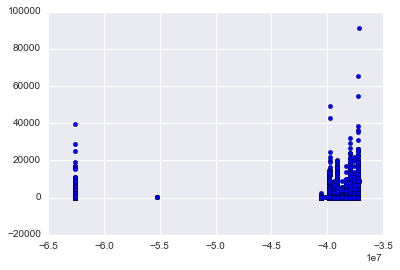

In [42]:
# plot results of approach 2 model
plt.scatter(prediction,y_test)

In [43]:
# Visualization of sum of sales by zip code will submitted separately

Now that I have an idea on how to move through my "paralysis by analysis" my goal for project 4 will be to develop, test, and validate a model on my own.

